# Quick Initial Analysis

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data/morphology_data.xlsx", sheet_name="morphology_EQ_Geneva")
df.head()

,id,left,top,right,bottom,row_index,col_index,field_1,PC1,PC2,...,noiseday_m,noisenight,bin_lst_me,bin_solar_,bin_sola_1,bin_pm10_m,bin_pm25_m,bin_no2_me,bin_noised,bin_noisen
0,36,2497723.99,1118389.101,2497973.99,1118139.101,10,1,1343,0.526055,0.338480,...,-1.409763,-1.450883,"(-0.699,-0.0567]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-2.7,-0.657]","(-2.55,-0.65]"
1,37,2497723.99,1118139.101,2497973.99,1117889.101,11,1,1344,0.851423,0.674067,...,-0.495672,-0.757194,"(-2.4,-0.699]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-0.657,0.0621]","(-2.55,-0.65]"
2,38,2497723.99,1117889.101,2497973.99,1117639.101,12,1,1345,-0.752449,0.148228,...,0.247978,0.128687,"(-0.699,-0.0567]","(-0.0457,0.658]","(-0.31,0.529]","(-0.717,-0.162]","(-0.731,-0.152]","(-0.72,-0.0796]","(0.0621,0.737]","(0.106,0.611]"
3,39,2497723.99,1117639.101,2497973.99,1117389.101,13,1,1346,1.066390,-0.858294,...,-0.072170,-0.152906,"(-2.4,-0.699]","(-2.51,-0.611]","(-1.71,-0.722]","(-2.17,-0.717]","(-0.731,-0.152]","(-2.33,-0.72]","(-0.657,0.0621]","(-0.65,0.106]"
4,40,2497723.99,1117389.101,2497973.99,1117139.101,14,1,1347,-0.433673,-0.642512,...,0.762563,0.617922,"(0.716,2.72]","(0.658,2.84]","(0.529,3.4]","(-0.717,-0.162]","(-0.731,-0.152]","(-2.33,-0.72]","(0.737,2.34]","(0.611,2.66]"


In [2]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of rows: 241
Number of features: 34


In [3]:
df["typology"].value_counts()

typology
A    58
E    42
J    27
B    26
C    25
G    25
D    20
I    12
F     5
K     1
Name: count, dtype: int64

In [4]:
print(df.columns.unique())

Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'field_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'city',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight',
       'bin_lst_me', 'bin_solar_', 'bin_sola_1', 'bin_pm10_m', 'bin_pm25_m',
       'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')


In [5]:
# Print the columns with unique values == len(df)

cols_to_remove = []
for col in df.columns:
    if col == "id":
        continue
    if df[col].nunique() == len(df) or df[col].nunique() <= 1:
        cols_to_remove.append(col)

print("Columns to remove: ", cols_to_remove)
df = df.drop(columns=cols_to_remove)

Columns to remove:  ['field_1', 'city']


In [6]:
features_to_remove = [
    "left",
    "top",
    "right",
    "bottom",
    "row_index",
    "col_index",
    "q_cluster",
    "z_distance",
]
df = df.drop(columns=features_to_remove)
print(f"Numbers of columns after removing metadata features: {len(df.columns)}")
print(df.columns)

Numbers of columns after removing metadata features: 24
Index(['id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'lst_mean',
       'solar_summ', 'solar_wint', 'pm10_mean', 'pm25_mean', 'no2_mean',
       'noiseday_m', 'noisenight', 'bin_lst_me', 'bin_solar_', 'bin_sola_1',
       'bin_pm10_m', 'bin_pm25_m', 'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')


In [7]:
# Remove the columns with the "bin" prefix, as they are binned versions of other columns
bin_columns = [col for col in df.columns if col.startswith("bin")]
df = df.drop(columns=bin_columns)
print(f"Numbers of columns after removing binned features: {len(df.columns)}")
print(df.columns)

Numbers of columns after removing binned features: 16
Index(['id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'lst_mean',
       'solar_summ', 'solar_wint', 'pm10_mean', 'pm25_mean', 'no2_mean',
       'noiseday_m', 'noisenight'],
      dtype='object')


In [8]:
# Print the rows where there are NaN values
original_rows_num = df.shape[0]
nan_rows = df[df.isna().any(axis=1)]
nan_rows
df.dropna(inplace=True)
print(f"Number of rows after dropping NaN values: {len(df)}")
print(f"Number of rows dropped: {original_rows_num - len(df)}")

Number of rows after dropping NaN values: 240
Number of rows dropped: 1


In [9]:
# Remove numeric columns with zero variance (constant columns)
numeric_cols = df.select_dtypes(include=["number"]).columns
zero_var_cols = [c for c in numeric_cols if abs(df[c].std()) <= 1e-8]
if zero_var_cols:
    print("Zero-variance numeric columns to remove:", zero_var_cols)
    df = df.drop(columns=zero_var_cols)
else:
    print("No zero-variance numeric columns found")
print(f"Columns remaining after removing zero-variance: {len(df.columns)}")

No zero-variance numeric columns found
Columns remaining after removing zero-variance: 16


In [10]:
# convert typology to categorical dtype
df["typology"] = df["typology"].astype("category")

In [11]:
# Save the cleaned dataframe
df.to_csv("data/morphology_data_cleaned.csv", index=False)

Compact **Exploratory Data Analysis (EDA)** of the cleaned morphological dataset regarding Geneva neighborhoods. Here we perform sanity checks, look at distributions, correlations,  structure of higher dimensional data PCA-derived, clustering tendencies as well as relationships between environmental quality and morphology-associated markers.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 240
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          240 non-null    int64   
 1   PC1         240 non-null    float64 
 2   PC2         240 non-null    float64 
 3   PC3         240 non-null    float64 
 4   PC4         240 non-null    float64 
 5   PC5         240 non-null    float64 
 6   PC6         240 non-null    float64 
 7   typology    240 non-null    category
 8   lst_mean    240 non-null    float64 
 9   solar_summ  240 non-null    float64 
 10  solar_wint  240 non-null    float64 
 11  pm10_mean   240 non-null    float64 
 12  pm25_mean   240 non-null    float64 
 13  no2_mean    240 non-null    float64 
 14  noiseday_m  240 non-null    float64 
 15  noisenight  240 non-null    float64 
dtypes: category(1), float64(14), int64(1)
memory usage: 30.6 KB


The features are already standardized, and they are also all continuous except for the id which is an integer and the typology which is a category

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,240.0,256.554167,110.487722,36.000000,166.750000,260.500000,344.250000,466.000000
PC1,240.0,-0.276652,0.990332,-4.838262,-0.906122,-0.138568,0.436716,1.921704
PC2,240.0,-0.007602,1.020836,-3.208794,-0.583750,0.038594,0.627072,4.381786
PC3,240.0,-0.133991,1.004006,-3.253529,-0.784161,-0.037030,0.458507,3.160354
PC4,240.0,-0.216103,0.944383,-3.014233,-0.888022,-0.258895,0.350770,2.422418
PC5,240.0,0.234959,0.814041,-2.517597,-0.379032,0.204648,0.693712,3.355186
PC6,240.0,0.268141,1.041847,-2.546661,-0.329660,0.208061,0.949746,4.888767
lst_mean,240.0,0.066048,1.013751,-2.398759,-0.698862,-0.043775,0.783261,2.719456
solar_summ,240.0,0.029420,1.028082,-3.959839,-0.407195,-0.205333,0.553019,5.038286
solar_wint,240.0,0.040750,0.994545,-2.147976,-0.514735,-0.192346,0.440508,4.570293


<Figure size 1200x800 with 0 Axes>

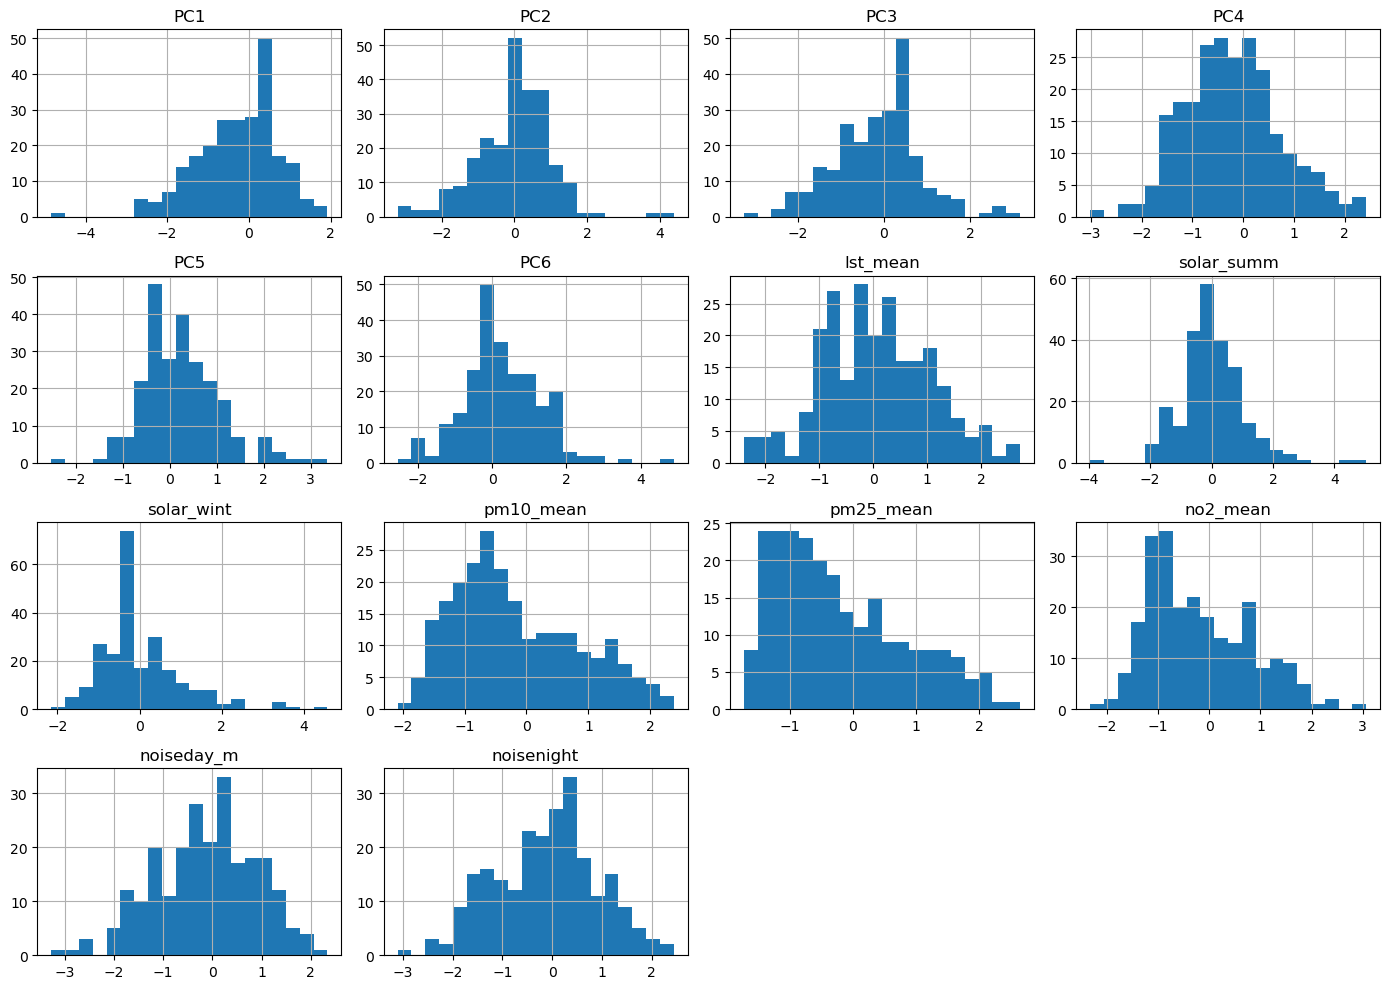

In [14]:
morph_cols = [c for c in df.columns if c.startswith("PC")]
env_cols = [
    "lst_mean",
    "solar_summ",
    "solar_wint",
    "pm10_mean",
    "pm25_mean",
    "no2_mean",
    "noiseday_m",
    "noisenight",
]

plt.figure(figsize=(12, 8))
df[morph_cols + env_cols].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

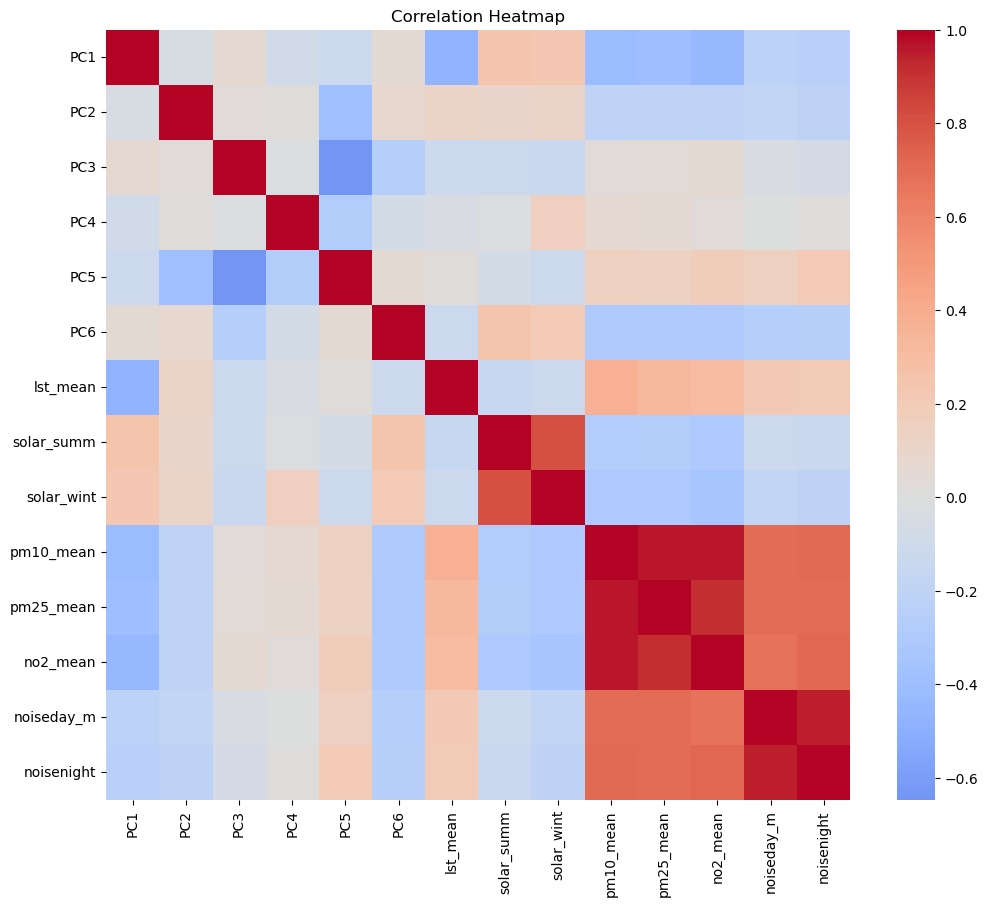

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[morph_cols + env_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

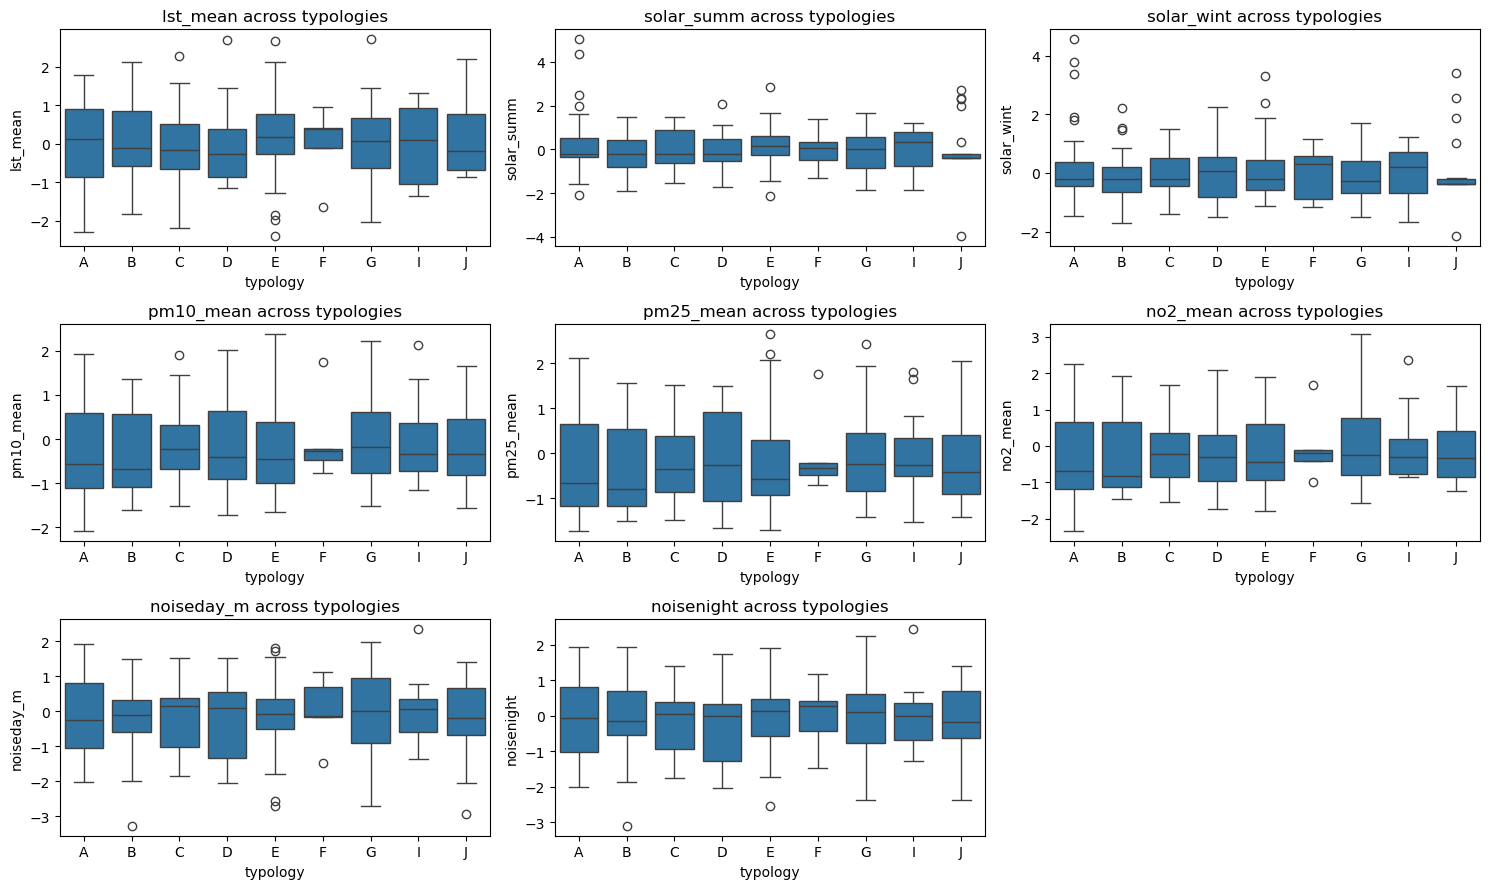

In [16]:
# arrange the env feature boxplots into a single grid of subplots
n = len(env_cols)
cols = min(3, n)
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3), squeeze=False)
axes_flat = axes.flatten()

for ax, var in zip(axes_flat, env_cols):
    sns.boxplot(data=df, x="typology", y=var, ax=ax)
    ax.set_title(f"{var} across typologies")
    plt.xticks(rotation=45)

# remove any unused axes (if n < rows*cols)
for ax in axes_flat[len(env_cols) :]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

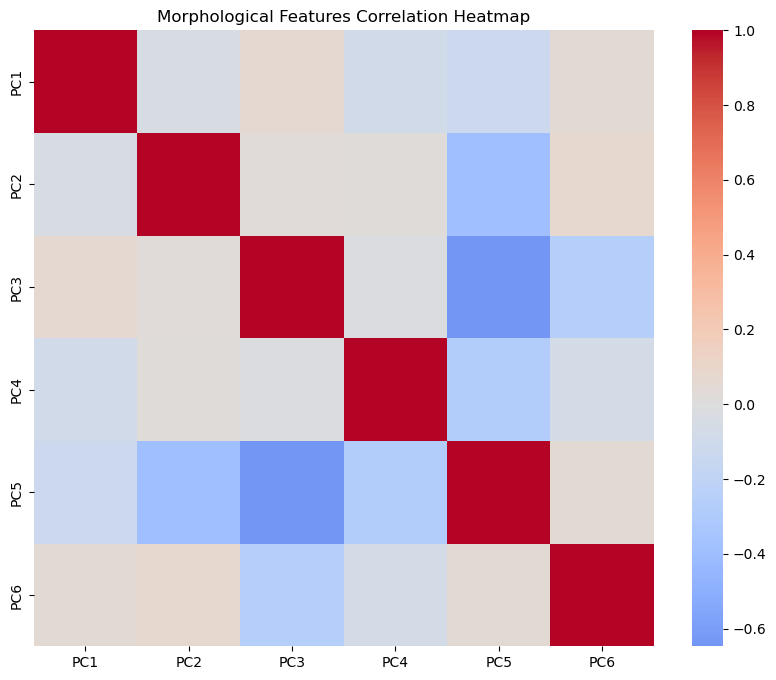

In [17]:
# PCA structure check - correlations should be close to zero

plt.figure(figsize=(10, 8))
sns.heatmap(df[morph_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Morphological Features Correlation Heatmap")
plt.show()

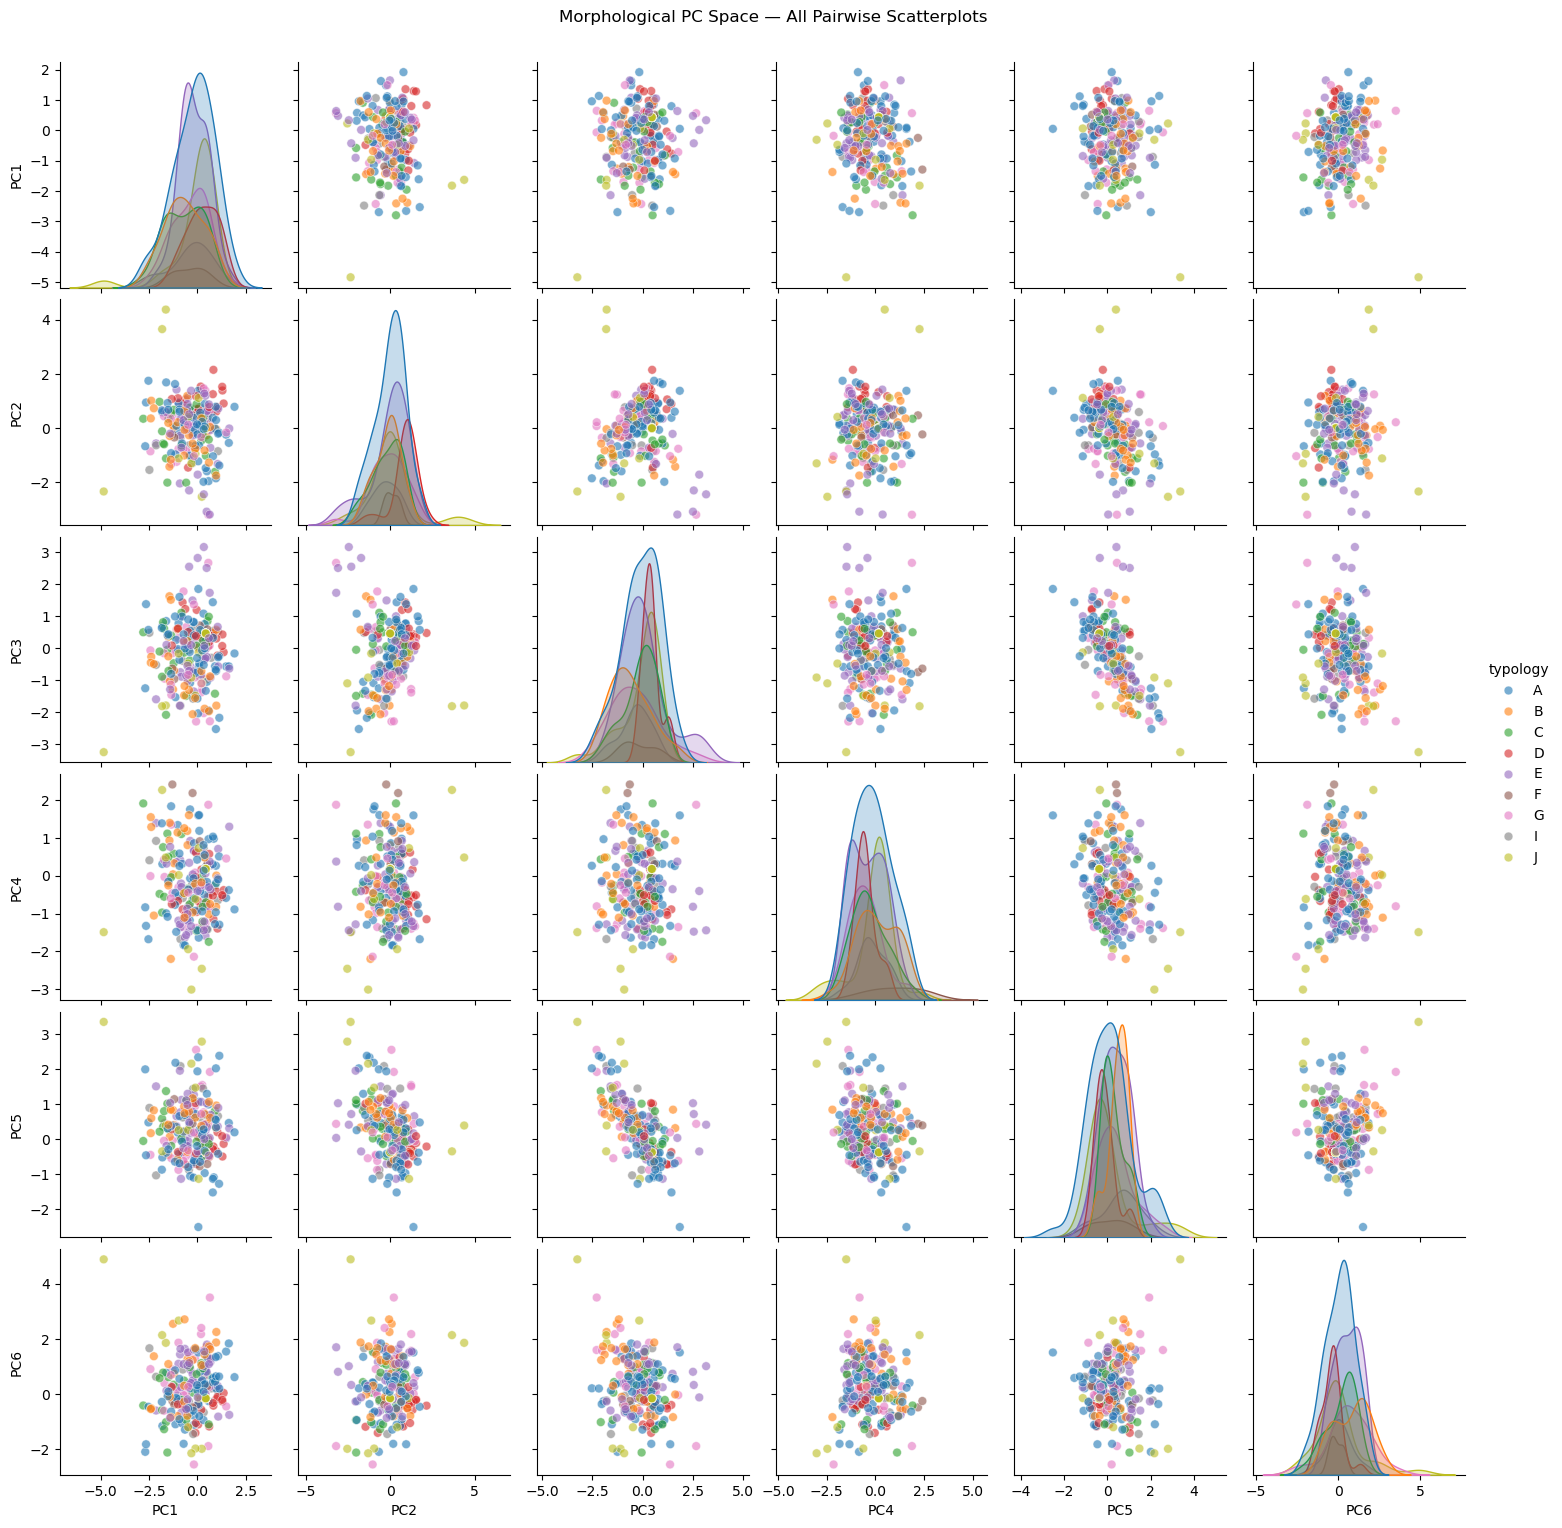

In [18]:
# all PC pairs in a grid
sns.pairplot(df, vars=morph_cols, hue="typology", plot_kws={"alpha": 0.6, "s": 40})
plt.suptitle("Morphological PC Space — All Pairwise Scatterplots", y=1.02)
plt.show()

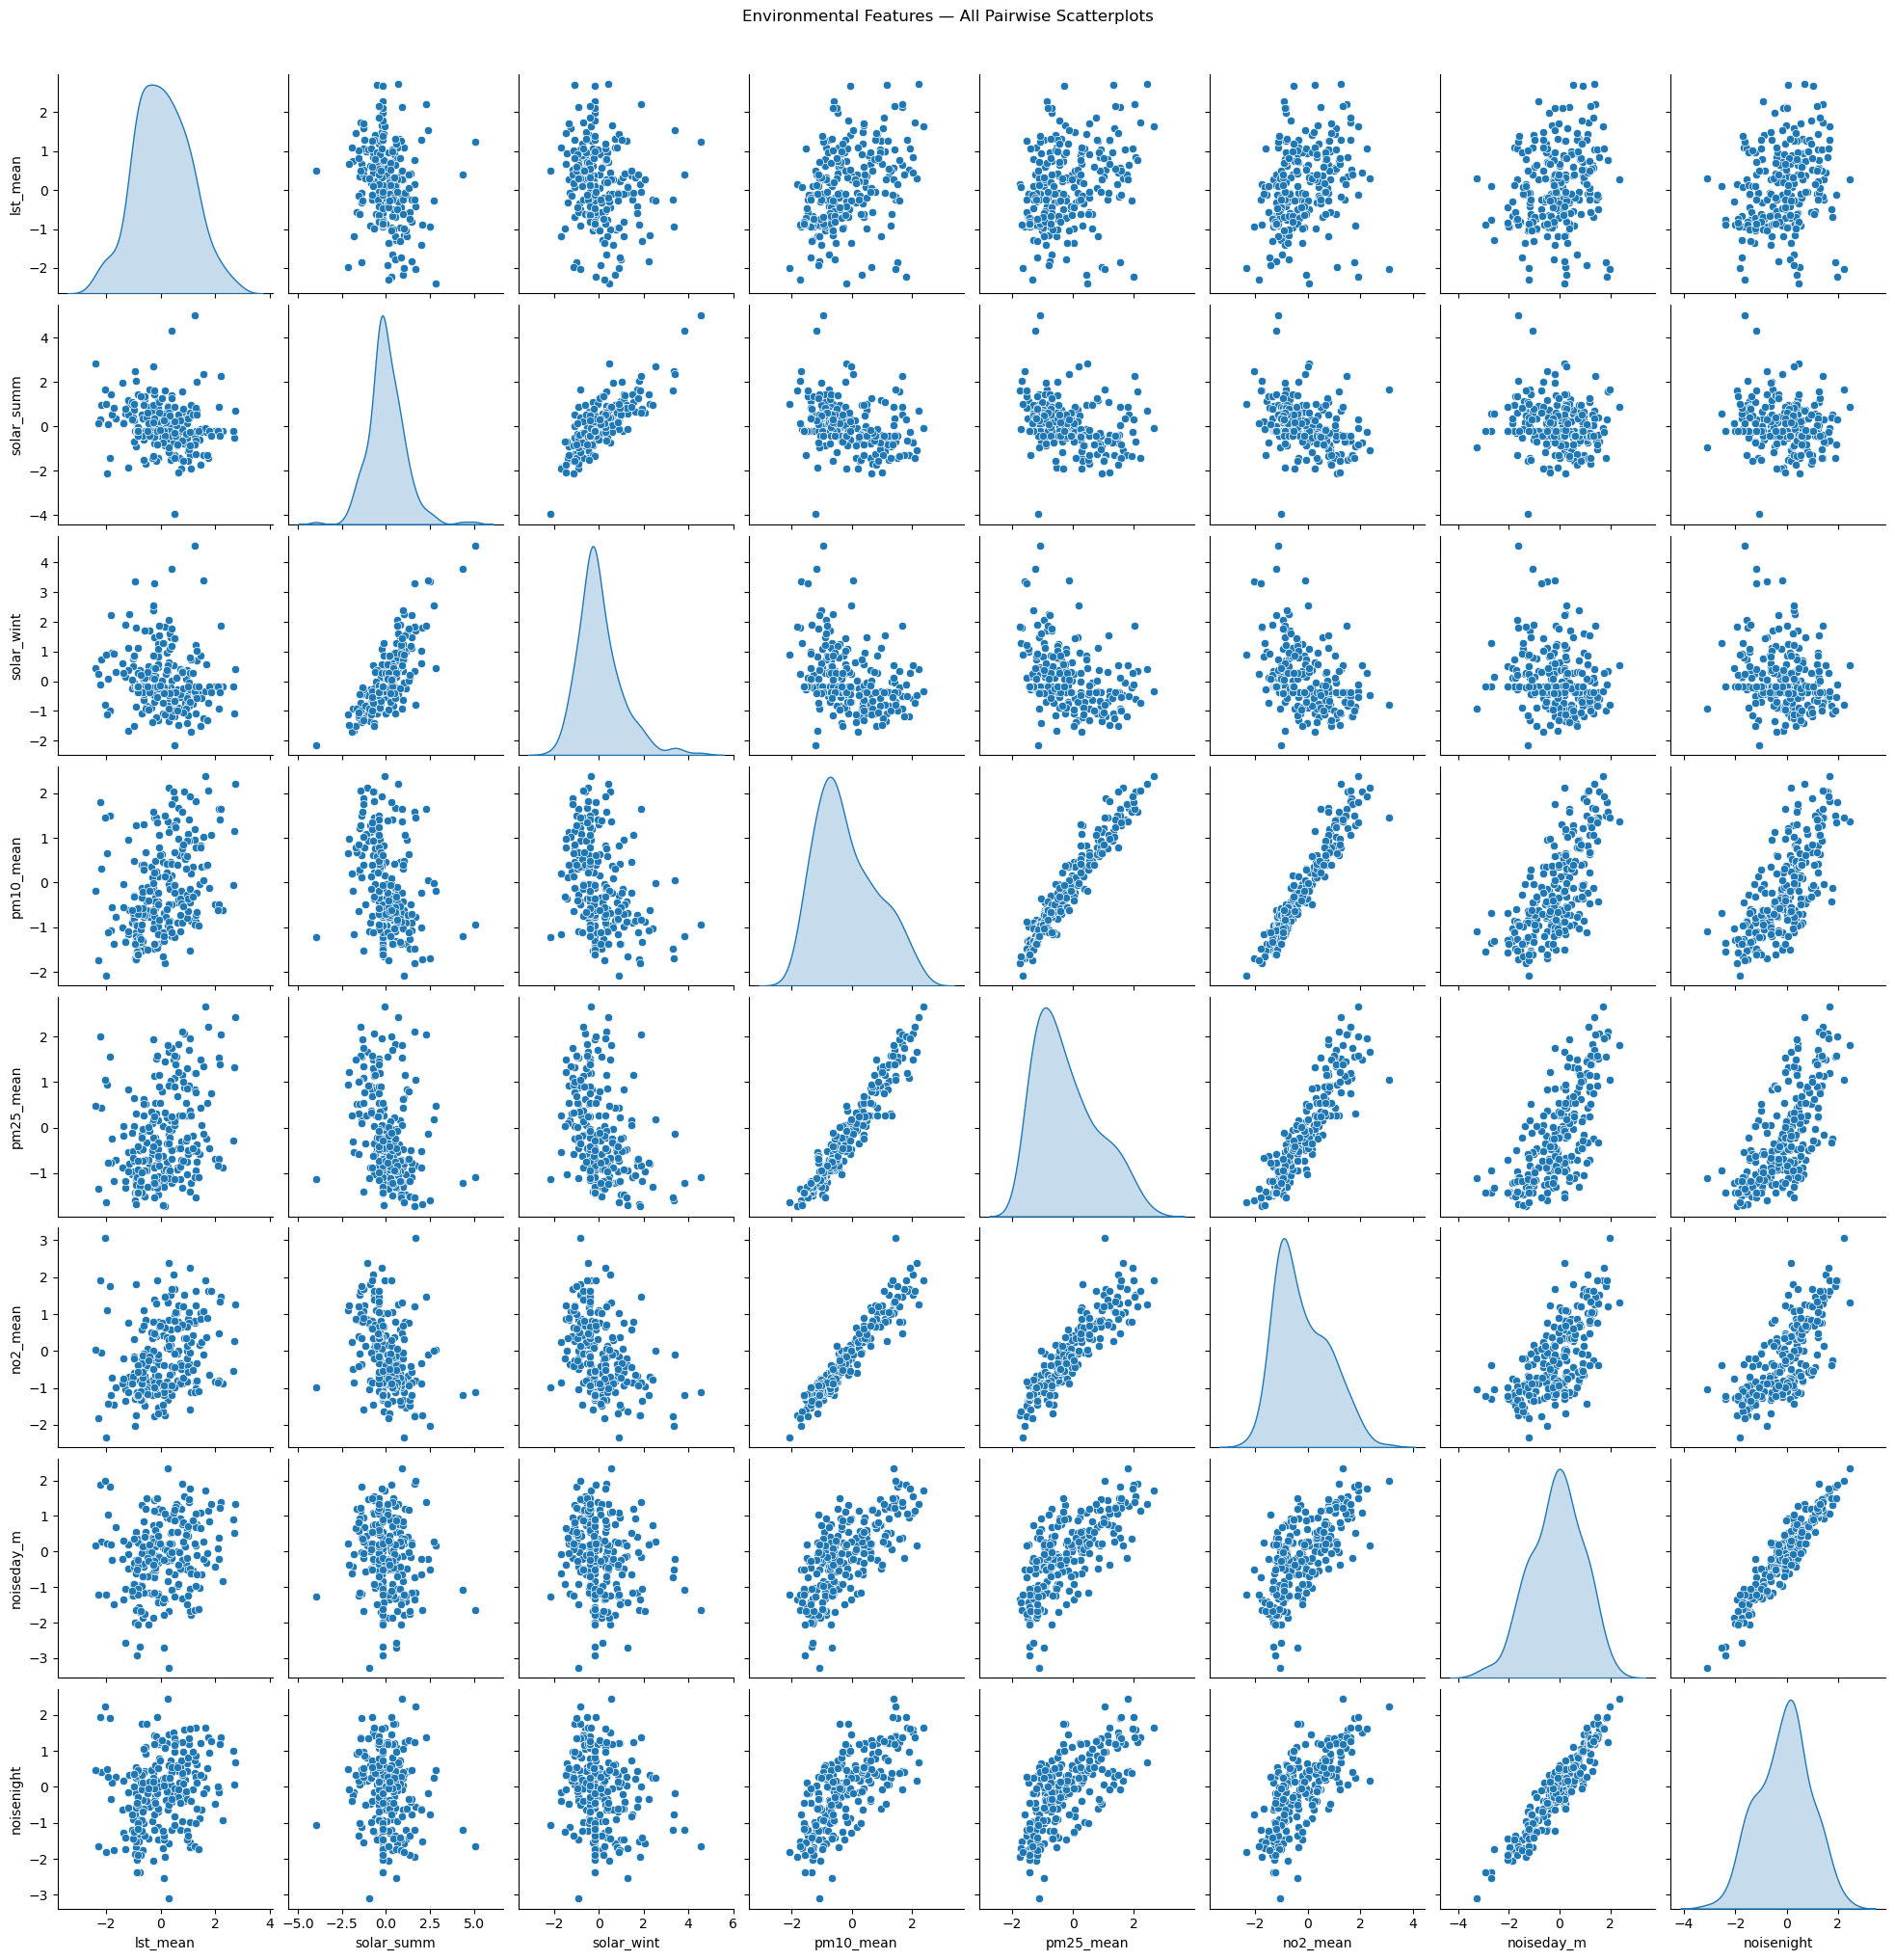

In [19]:
# pairplot for compact visual overview to show all pairwise scatter plots, maybe catch nonlinear relations
sns.pairplot(df[env_cols], diag_kind="kde")
plt.suptitle("Environmental Features — All Pairwise Scatterplots", y=1.02)
plt.show()

# Pipeline

In [20]:
from src.utils.pipeline import (
    load_combined_dataset,
    run_preprocessing_pipeline,
    ohe_features,
)
from src.feature_config import (
    ALL_CONTINUOUS_FEATURES,
    ALL_CATEGORICAL_FEATURES,
    ALL_BINARY_FEATURES,
    POSSIBLE_TARGET_FEATURES,
)
from src.target_definition.aggregate import aggregate_health_targets
from src.feature_selection import compute_associations, compute_categorical_associations
from src.predictive import run_modeling_suite

In [21]:
df = load_combined_dataset(
    "data/morphology_data_cleaned.csv",
    "data/synthetic_health_data.xlsx",
)
df = run_preprocessing_pipeline(df)
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (2631, 28)


In [22]:
df.columns.to_list()

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'typology',
 'lst_mean',
 'solar_summ',
 'solar_wint',
 'pm10_mean',
 'pm25_mean',
 'no2_mean',
 'noiseday_m',
 'noisenight',
 'sex',
 'income',
 'education_level',
 'heart_failure',
 'heart_rhythm',
 'd_breath_respiratory',
 'd_breath_asthma',
 'GHQ12_score',
 'points_sleep_deprivation',
 'sleep_disorder_hot',
 'sleeping_hours',
 'bedtime_hour',
 'age_bin']

In [23]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,typology,lst_mean,solar_summ,solar_wint,...,heart_failure,heart_rhythm,d_breath_respiratory,d_breath_asthma,GHQ12_score,points_sleep_deprivation,sleep_disorder_hot,sleeping_hours,bedtime_hour,age_bin
0,0.526055,0.33848,0.846051,-1.420268,-0.217506,0.687111,C,-0.111053,1.130211,0.982144,...,0,0,0,1,10,10,0,6.239702,1260.633333,1
1,0.526055,0.33848,0.846051,-1.420268,-0.217506,0.687111,C,-0.111053,1.130211,0.982144,...,0,0,0,0,7,0,0,5.047253,1380.366667,3
2,0.526055,0.33848,0.846051,-1.420268,-0.217506,0.687111,C,-0.111053,1.130211,0.982144,...,0,0,0,0,3,6,1,6.704064,1380.183333,2
3,0.526055,0.33848,0.846051,-1.420268,-0.217506,0.687111,C,-0.111053,1.130211,0.982144,...,0,0,0,0,1,18,0,4.283209,1200.316667,2
4,0.526055,0.33848,0.846051,-1.420268,-0.217506,0.687111,C,-0.111053,1.130211,0.982144,...,0,0,0,0,0,20,0,5.790631,1260.916667,3


We only have 14 continuous features so probably applying PCA doesn't make sense (also 6 of those 14 features are principal components of other data) 

In [24]:
print(
    f"Number of features that are continuous: {len([col for col in df.columns if col in ALL_CONTINUOUS_FEATURES and col not in POSSIBLE_TARGET_FEATURES])}",
)

Number of features that are continuous: 17


In [25]:
# Improved target logic

mental_df = aggregate_health_targets(df, target_feature="mental_health")
heart_df = aggregate_health_targets(df, target_feature="cardiovascular")
sleep_df = aggregate_health_targets(df, target_feature="sleep_disorder")
respiratory_df = aggregate_health_targets(df, target_feature="respiratory")

# All of the above dataframes have different "target" columns, but the same features

Compute association statistics on categorical features before one hot encoding them

In [26]:
datasets = {
    "mental_health": mental_df,
    "cardiovascular": heart_df,
    "sleep_disorder": sleep_df,
    "respiratory": respiratory_df,
}

feature_types = {}
for column in df.columns:
    if column in ALL_CONTINUOUS_FEATURES:
        feature_types[column] = "continuous"
    elif column in ALL_CATEGORICAL_FEATURES:
        feature_types[column] = "categorical"
    elif column in ALL_BINARY_FEATURES:
        feature_types[column] = "binary"
    else:
        non_null_values = df[column].dropna()
        if not non_null_values.empty and non_null_values.isin([0, 1]).all():
            feature_types[column] = "binary"
        else:
            feature_types[column] = "continuous"

# Add the target feature type for all datasets (continuous risk scores)
feature_types["target"] = "continuous"

for name, dataset in datasets.items():
    print(f"\n=== Analyzing target type: {name} ===")

    categorical_association_df = compute_categorical_associations(
        dataset,
        "target",
        feature_types,
    )
    if categorical_association_df is not None:
        display(categorical_association_df)

    # one hot encoding of categorical features after having computed some statistics on it
    dataset, new_feature_types = ohe_features(dataset, feature_types)
    datasets[name] = dataset

    # compute all association statistics
    association_df, vif_df = compute_associations(
        dataset,
        "target",
        new_feature_types,
    )

    for test_name, subset in association_df.groupby("test", sort=False):
        print(f"\nTest: {test_name}")
        display(subset.reset_index(drop=True))

    print(f"\nTest: VIF")
    display(vif_df.drop(columns=["p_value"], errors="ignore").reset_index(drop=True))

feature_types = new_feature_types


=== Analyzing target type: mental_health ===


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology,categorical,ANOVA,F,0.902076,0.51363



Test: Univariate linear regression


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_C,binary,Univariate linear regression,coef[typology_C],0.047771,0.039874
1,typology_A,binary,Univariate linear regression,coef[typology_A],-0.025940,0.122389
2,solar_wint,continuous,Univariate linear regression,coef[solar_wint],-0.010351,0.153758
3,solar_summ,continuous,Univariate linear regression,coef[solar_summ],-0.007806,0.264353
4,typology_B,binary,Univariate linear regression,coef[typology_B],-0.021642,0.358952
5,typology_G,binary,Univariate linear regression,coef[typology_G],0.018164,0.438371
6,noiseday_m,continuous,Univariate linear regression,coef[noiseday_m],-0.005289,0.451192
7,PC6,continuous,Univariate linear regression,coef[PC6],0.004972,0.471451
8,PC3,continuous,Univariate linear regression,coef[PC3],-0.005083,0.475642
9,PC5,continuous,Univariate linear regression,coef[PC5],0.005836,0.500876



Test: Point-biserial correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_C,binary,Point-biserial correlation,r_pb,0.040068,0.039874
1,typology_A,binary,Point-biserial correlation,r_pb,-0.030125,0.122389
2,typology_B,binary,Point-biserial correlation,r_pb,-0.017892,0.358952
3,typology_G,binary,Point-biserial correlation,r_pb,0.015114,0.438371
4,typology_F,binary,Point-biserial correlation,r_pb,-0.008100,0.677943
5,typology_E,binary,Point-biserial correlation,r_pb,0.006800,0.727370
6,sex,binary,Point-biserial correlation,r_pb,-0.005367,0.783196
7,typology_I,binary,Point-biserial correlation,r_pb,-0.004680,0.810371
8,typology_D,binary,Point-biserial correlation,r_pb,0.002253,0.908052
9,typology_J,binary,Point-biserial correlation,r_pb,0.000917,0.962493



Test: Pearson correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,solar_wint,continuous,Pearson correlation,r,-0.027816,0.153758
1,solar_summ,continuous,Pearson correlation,r,-0.021768,0.264353
2,noiseday_m,continuous,Pearson correlation,r,-0.014695,0.451192
3,PC6,continuous,Pearson correlation,r,0.014045,0.471451
4,PC3,continuous,Pearson correlation,r,-0.013913,0.475642
5,PC5,continuous,Pearson correlation,r,0.013128,0.500876
6,education_level,continuous,Pearson correlation,r,0.012918,0.507766
7,PC1,continuous,Pearson correlation,r,-0.012841,0.510302
8,age_bin,continuous,Pearson correlation,r,0.008906,0.647952
9,PC4,continuous,Pearson correlation,r,-0.007554,0.698559



Test: Spearman correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,education_level,continuous,Spearman correlation,rho,0.017471,0.370370
1,solar_summ,continuous,Spearman correlation,rho,-0.016208,0.405971
2,PC3,continuous,Spearman correlation,rho,-0.016119,0.408545
3,PC5,continuous,Spearman correlation,rho,0.015851,0.416379
4,noisenight,continuous,Spearman correlation,rho,-0.013893,0.476260
5,noiseday_m,continuous,Spearman correlation,rho,-0.011652,0.550224
6,PC6,continuous,Spearman correlation,rho,0.010962,0.574098
7,solar_wint,continuous,Spearman correlation,rho,-0.009823,0.614541
8,PC1,continuous,Spearman correlation,rho,-0.008547,0.661244
9,lst_mean,continuous,Spearman correlation,rho,0.008238,0.672777



Test: VIF


,predictor,predictor_type,test,statistic_name,statistic_value
0,pm10_mean,continuous,VIF,VIF,30.137756
1,pm25_mean,continuous,VIF,VIF,15.204311
2,no2_mean,continuous,VIF,VIF,14.160256
3,noisenight,continuous,VIF,VIF,12.129615
4,noiseday_m,continuous,VIF,VIF,11.278375
5,PC5,continuous,VIF,VIF,3.285198
6,solar_wint,continuous,VIF,VIF,3.245883
7,solar_summ,continuous,VIF,VIF,3.109991
8,PC3,continuous,VIF,VIF,2.791868
9,lst_mean,continuous,VIF,VIF,1.795462



=== Analyzing target type: cardiovascular ===


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology,categorical,ANOVA,F,1.496947,0.152909



Test: Univariate linear regression


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_I,binary,Univariate linear regression,coef[typology_I],0.055560,0.009103
1,age_bin,continuous,Univariate linear regression,coef[age_bin],-0.006194,0.128385
2,typology_G,binary,Univariate linear regression,coef[typology_G],-0.019001,0.203191
3,no2_mean,continuous,Univariate linear regression,coef[no2_mean],0.005815,0.207853
4,typology_E,binary,Univariate linear regression,coef[typology_E],-0.015054,0.212242
5,lst_mean,continuous,Univariate linear regression,coef[lst_mean],-0.005491,0.216234
6,pm10_mean,continuous,Univariate linear regression,coef[pm10_mean],0.004841,0.293322
7,solar_wint,continuous,Univariate linear regression,coef[solar_wint],-0.004827,0.296506
8,typology_C,binary,Univariate linear regression,coef[typology_C],0.014786,0.318227
9,typology_J,binary,Univariate linear regression,coef[typology_J],-0.014071,0.324803



Test: Point-biserial correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_I,binary,Point-biserial correlation,r_pb,0.050839,0.009103
1,typology_G,binary,Point-biserial correlation,r_pb,-0.024817,0.203191
2,typology_E,binary,Point-biserial correlation,r_pb,-0.024327,0.212242
3,typology_C,binary,Point-biserial correlation,r_pb,0.019466,0.318227
4,typology_J,binary,Point-biserial correlation,r_pb,-0.019204,0.324803
5,typology_F,binary,Point-biserial correlation,r_pb,0.015778,0.418539
6,typology_B,binary,Point-biserial correlation,r_pb,0.012375,0.525777
7,sex,binary,Point-biserial correlation,r_pb,0.003531,0.856324
8,typology_D,binary,Point-biserial correlation,r_pb,-0.000495,0.979771
9,typology_A,binary,Point-biserial correlation,r_pb,0.000284,0.988390



Test: Spearman correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,no2_mean,continuous,Spearman correlation,rho,0.035234,0.070765
1,age_bin,continuous,Spearman correlation,rho,-0.034636,0.075689
2,pm10_mean,continuous,Spearman correlation,rho,0.030112,0.122551
3,PC5,continuous,Spearman correlation,rho,0.025675,0.187990
4,education_level,continuous,Spearman correlation,rho,-0.024831,0.202925
5,PC6,continuous,Spearman correlation,rho,-0.023806,0.222212
6,lst_mean,continuous,Spearman correlation,rho,-0.023194,0.234327
7,PC3,continuous,Spearman correlation,rho,-0.022677,0.244926
8,pm25_mean,continuous,Spearman correlation,rho,0.021942,0.260562
9,noisenight,continuous,Spearman correlation,rho,0.019514,0.317046



Test: Pearson correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,age_bin,continuous,Pearson correlation,r,-0.029651,0.128385
1,no2_mean,continuous,Pearson correlation,r,0.024563,0.207853
2,lst_mean,continuous,Pearson correlation,r,-0.024116,0.216234
3,pm10_mean,continuous,Pearson correlation,r,0.020495,0.293322
4,solar_wint,continuous,Pearson correlation,r,-0.020360,0.296506
5,education_level,continuous,Pearson correlation,r,-0.018865,0.333414
6,PC3,continuous,Pearson correlation,r,-0.018151,0.352039
7,PC1,continuous,Pearson correlation,r,0.018017,0.355586
8,noisenight,continuous,Pearson correlation,r,0.017199,0.377858
9,pm25_mean,continuous,Pearson correlation,r,0.014101,0.469702



Test: VIF


,predictor,predictor_type,test,statistic_name,statistic_value
0,pm10_mean,continuous,VIF,VIF,30.137756
1,pm25_mean,continuous,VIF,VIF,15.204311
2,no2_mean,continuous,VIF,VIF,14.160256
3,noisenight,continuous,VIF,VIF,12.129615
4,noiseday_m,continuous,VIF,VIF,11.278375
5,PC5,continuous,VIF,VIF,3.285198
6,solar_wint,continuous,VIF,VIF,3.245883
7,solar_summ,continuous,VIF,VIF,3.109991
8,PC3,continuous,VIF,VIF,2.791868
9,lst_mean,continuous,VIF,VIF,1.795462



=== Analyzing target type: sleep_disorder ===


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology,categorical,ANOVA,F,0.931846,0.488667



Test: Spearman correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,lst_mean,continuous,Spearman correlation,rho,-0.034228,0.079203
1,PC1,continuous,Spearman correlation,rho,0.032907,0.091496
2,PC5,continuous,Spearman correlation,rho,-0.022626,0.245991
3,PC2,continuous,Spearman correlation,rho,0.019356,0.320975
4,PC6,continuous,Spearman correlation,rho,0.019159,0.325919
5,age_bin,continuous,Spearman correlation,rho,-0.017187,0.378208
6,solar_summ,continuous,Spearman correlation,rho,-0.016374,0.401167
7,noisenight,continuous,Spearman correlation,rho,0.012967,0.506168
8,PC3,continuous,Spearman correlation,rho,0.012859,0.509722
9,no2_mean,continuous,Spearman correlation,rho,0.009259,0.634987



Test: Point-biserial correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_F,binary,Point-biserial correlation,r_pb,-0.033302,0.087671
1,typology_J,binary,Point-biserial correlation,r_pb,0.028540,0.143322
2,typology_G,binary,Point-biserial correlation,r_pb,-0.022493,0.248780
3,typology_I,binary,Point-biserial correlation,r_pb,0.020324,0.297372
4,sex,binary,Point-biserial correlation,r_pb,0.012924,0.507580
5,typology_A,binary,Point-biserial correlation,r_pb,-0.010873,0.577226
6,typology_E,binary,Point-biserial correlation,r_pb,0.009243,0.635566
7,typology_C,binary,Point-biserial correlation,r_pb,-0.003792,0.845869
8,typology_D,binary,Point-biserial correlation,r_pb,0.003164,0.871153
9,typology_B,binary,Point-biserial correlation,r_pb,-0.001089,0.955472



Test: Univariate linear regression


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_F,binary,Univariate linear regression,coef[typology_F],-0.058231,0.087671
1,lst_mean,continuous,Univariate linear regression,coef[lst_mean],-0.007427,0.123802
2,typology_J,binary,Univariate linear regression,coef[typology_J],0.022728,0.143322
3,PC1,continuous,Univariate linear regression,coef[PC1],0.007246,0.154789
4,PC5,continuous,Univariate linear regression,coef[PC5],-0.007355,0.220463
5,typology_G,binary,Univariate linear regression,coef[typology_G],-0.018716,0.248780
6,solar_summ,continuous,Univariate linear regression,coef[solar_summ],-0.005516,0.254638
7,typology_I,binary,Univariate linear regression,coef[typology_I],0.024139,0.297372
8,PC3,continuous,Univariate linear regression,coef[PC3],0.004196,0.395032
9,PC2,continuous,Univariate linear regression,coef[PC2],0.003860,0.430652



Test: Pearson correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,lst_mean,continuous,Pearson correlation,r,-0.030012,0.123802
1,PC1,continuous,Pearson correlation,r,0.027747,0.154789
2,PC5,continuous,Pearson correlation,r,-0.023896,0.220463
3,solar_summ,continuous,Pearson correlation,r,-0.022217,0.254638
4,PC3,continuous,Pearson correlation,r,0.016588,0.395032
5,PC2,continuous,Pearson correlation,r,0.015371,0.430652
6,age_bin,continuous,Pearson correlation,r,-0.014760,0.449192
7,no2_mean,continuous,Pearson correlation,r,0.013388,0.492434
8,noisenight,continuous,Pearson correlation,r,0.013173,0.499438
9,solar_wint,continuous,Pearson correlation,r,-0.009677,0.619782



Test: VIF


,predictor,predictor_type,test,statistic_name,statistic_value
0,pm10_mean,continuous,VIF,VIF,30.137756
1,pm25_mean,continuous,VIF,VIF,15.204311
2,no2_mean,continuous,VIF,VIF,14.160256
3,noisenight,continuous,VIF,VIF,12.129615
4,noiseday_m,continuous,VIF,VIF,11.278375
5,PC5,continuous,VIF,VIF,3.285198
6,solar_wint,continuous,VIF,VIF,3.245883
7,solar_summ,continuous,VIF,VIF,3.109991
8,PC3,continuous,VIF,VIF,2.791868
9,lst_mean,continuous,VIF,VIF,1.795462



=== Analyzing target type: respiratory ===


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology,categorical,ANOVA,F,0.40955,0.915713



Test: Univariate linear regression


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,solar_summ,continuous,Univariate linear regression,coef[solar_summ],-0.008630,0.046612
1,typology_F,binary,Univariate linear regression,coef[typology_F],-0.045567,0.135807
2,PC6,continuous,Univariate linear regression,coef[PC6],-0.006239,0.145121
3,PC3,continuous,Univariate linear regression,coef[PC3],0.005480,0.215018
4,education_level,continuous,Univariate linear regression,coef[education_level],-0.004783,0.222824
5,solar_wint,continuous,Univariate linear regression,coef[solar_wint],-0.005406,0.229825
6,PC4,continuous,Univariate linear regression,coef[PC4],-0.003902,0.401304
7,PC2,continuous,Univariate linear regression,coef[PC2],0.003548,0.418709
8,age_bin,continuous,Univariate linear regression,coef[age_bin],-0.002885,0.467031
9,typology_C,binary,Univariate linear regression,coef[typology_C],0.009642,0.503868



Test: Pearson correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,solar_summ,continuous,Pearson correlation,r,-0.038797,0.046612
1,PC6,continuous,Pearson correlation,r,-0.028413,0.145121
2,PC3,continuous,Pearson correlation,r,0.024180,0.215018
3,education_level,continuous,Pearson correlation,r,-0.023774,0.222824
4,solar_wint,continuous,Pearson correlation,r,-0.023419,0.229825
5,PC4,continuous,Pearson correlation,r,-0.016369,0.401304
6,PC2,continuous,Pearson correlation,r,0.015772,0.418709
7,age_bin,continuous,Pearson correlation,r,-0.014186,0.467031
8,income,continuous,Pearson correlation,r,-0.010036,0.606859
9,noiseday_m,continuous,Pearson correlation,r,0.008576,0.660176



Test: Spearman correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,solar_summ,continuous,Spearman correlation,rho,-0.037712,0.053098
1,solar_wint,continuous,Spearman correlation,rho,-0.029018,0.136744
2,education_level,continuous,Spearman correlation,rho,-0.028200,0.148161
3,PC6,continuous,Spearman correlation,rho,-0.027046,0.165480
4,PC3,continuous,Spearman correlation,rho,0.020245,0.299246
5,PC2,continuous,Spearman correlation,rho,0.013875,0.476848
6,age_bin,continuous,Spearman correlation,rho,-0.011923,0.540997
7,PC4,continuous,Spearman correlation,rho,-0.011494,0.555664
8,noiseday_m,continuous,Spearman correlation,rho,0.006165,0.751964
9,income,continuous,Spearman correlation,rho,-0.005261,0.787356



Test: Point-biserial correlation


,predictor,predictor_type,test,statistic_name,statistic_value,p_value
0,typology_F,binary,Point-biserial correlation,r_pb,-0.029087,0.135807
1,typology_C,binary,Point-biserial correlation,r_pb,0.013037,0.503868
2,typology_A,binary,Point-biserial correlation,r_pb,-0.009545,0.624561
3,typology_D,binary,Point-biserial correlation,r_pb,0.009374,0.630795
4,typology_G,binary,Point-biserial correlation,r_pb,0.008334,0.669157
5,typology_J,binary,Point-biserial correlation,r_pb,-0.005486,0.778526
6,typology_E,binary,Point-biserial correlation,r_pb,0.005158,0.791426
7,sex,binary,Point-biserial correlation,r_pb,-0.002952,0.879721
8,typology_B,binary,Point-biserial correlation,r_pb,-0.002609,0.893592
9,typology_I,binary,Point-biserial correlation,r_pb,-0.001461,0.940276



Test: VIF


,predictor,predictor_type,test,statistic_name,statistic_value
0,pm10_mean,continuous,VIF,VIF,30.137756
1,pm25_mean,continuous,VIF,VIF,15.204311
2,no2_mean,continuous,VIF,VIF,14.160256
3,noisenight,continuous,VIF,VIF,12.129615
4,noiseday_m,continuous,VIF,VIF,11.278375
5,PC5,continuous,VIF,VIF,3.285198
6,solar_wint,continuous,VIF,VIF,3.245883
7,solar_summ,continuous,VIF,VIF,3.109991
8,PC3,continuous,VIF,VIF,2.791868
9,lst_mean,continuous,VIF,VIF,1.795462


Running Predictive Modeling Suite for All Datasets

Processing: MENTAL_HEALTH...
Processing: CARDIOVASCULAR...
Processing: SLEEP_DISORDER...
Processing: RESPIRATORY...

COMBINED REGRESSION RESULTS


,Dataset,model,RMSE,MAE,R2
0,MENTAL_HEALTH,Lasso Regression,0.383127,0.347631,-0.014686
1,MENTAL_HEALTH,Linear Regression,0.383448,0.348075,-0.016389
2,MENTAL_HEALTH,Ridge Regression,0.383450,0.348073,-0.016399
3,MENTAL_HEALTH,Kernel Ridge,0.391099,0.347884,-0.057350
4,MENTAL_HEALTH,k-NN Regressor,0.407808,0.352085,-0.149626
5,MENTAL_HEALTH,Random Forest Regressor,0.409154,0.356764,-0.157227
6,MENTAL_HEALTH,SVR (RBF),0.420022,0.344127,-0.219521
7,CARDIOVASCULAR,Linear Regression,0.230770,0.189393,-0.007417
8,CARDIOVASCULAR,Ridge Regression,0.230771,0.189394,-0.007423
9,CARDIOVASCULAR,Lasso Regression,0.230796,0.189772,-0.007642



MODEL COEFFICIENTS (Linear Models)


,Dataset,model,feature,coefficient
0,MENTAL_HEALTH,Linear Regression,PC1,-0.005590
1,MENTAL_HEALTH,Linear Regression,PC2,0.004909
2,MENTAL_HEALTH,Linear Regression,PC3,-0.002914
3,MENTAL_HEALTH,Linear Regression,PC4,0.000067
4,MENTAL_HEALTH,Linear Regression,PC5,0.001302
...,...,...,...,...
319,RESPIRATORY,Lasso Regression,typology_E,0.000542
320,RESPIRATORY,Lasso Regression,typology_F,-0.007968
321,RESPIRATORY,Lasso Regression,typology_G,0.004251
322,RESPIRATORY,Lasso Regression,typology_I,0.000000



RESIDUAL PLOTS (Best Model per Dataset)


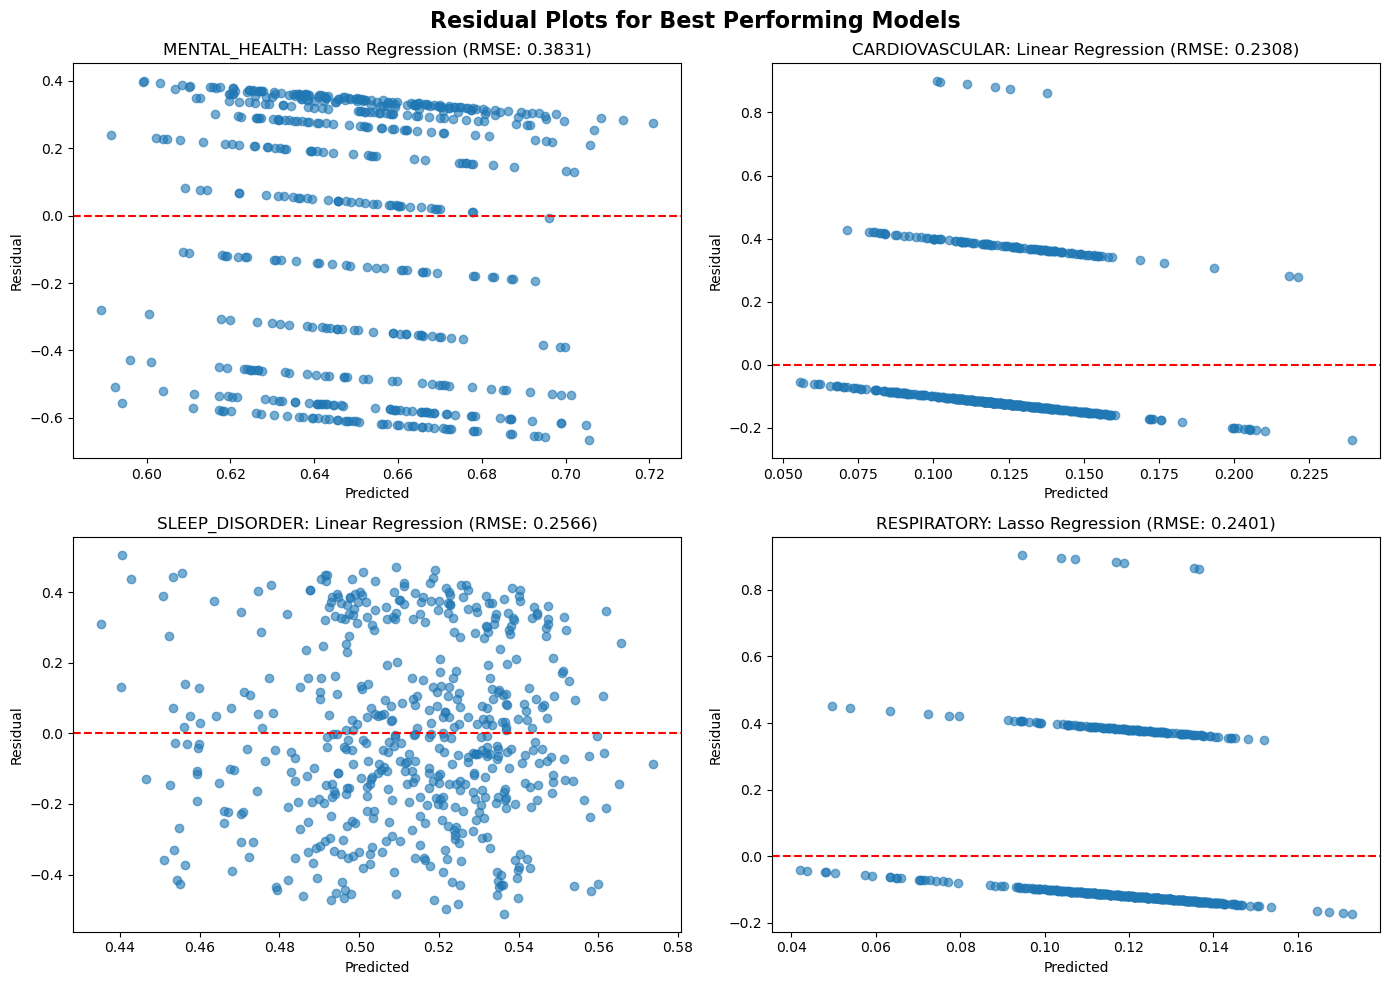

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store results
all_regression_results = []
all_classification_results = []
all_coefficients = []

# Initialize dictionaries for plots
all_residual_plots = {}
all_confusion_matrices = {}

print("Running Predictive Modeling Suite for All Datasets\n")

for name, dataset in datasets.items():
    print(f"Processing: {name.upper()}...")

    model_results = run_modeling_suite(
        dataset,
        "target",
        feature_types=feature_types,
    )

    target_type = model_results["target_type"]

    if target_type == "continuous":
        # Collect Regression Results
        reg_df = model_results.get("regression_results", pd.DataFrame())
        if not reg_df.empty:
            reg_df["Dataset"] = name.upper()
            all_regression_results.append(reg_df)

        # Collect Coefficients
        coef_df = model_results.get("coefficients", pd.DataFrame())
        if not coef_df.empty:
            coef_df["Dataset"] = name.upper()
            all_coefficients.append(coef_df)

        # Collect Residual Plots
        residuals = model_results.get("residuals", {})
        if residuals:
            all_residual_plots[name] = residuals

    else:
        # Collect Classification Results
        clf_df = model_results.get("classification_results", pd.DataFrame())
        if not clf_df.empty:
            clf_df["Dataset"] = name.upper()
            all_classification_results.append(clf_df)

        # Collect Confusion Matrices
        cms = model_results.get("confusion_matrices", {})
        if cms:
            all_confusion_matrices[name] = cms

# --- Display Summary Results ---

final_reg_df = pd.DataFrame()
if all_regression_results:
    print()
    print(f"COMBINED REGRESSION RESULTS")
    final_reg_df = pd.concat(all_regression_results, ignore_index=True)
    # Reorder columns to put Dataset first
    cols = ["Dataset"] + [c for c in final_reg_df.columns if c != "Dataset"]
    display(final_reg_df[cols])

if all_classification_results:
    print()
    print(f"COMBINED CLASSIFICATION RESULTS")
    final_clf_df = pd.concat(all_classification_results, ignore_index=True)
    cols = ["Dataset"] + [c for c in final_clf_df.columns if c != "Dataset"]
    display(final_clf_df[cols])

if all_coefficients:
    print()
    print(f"MODEL COEFFICIENTS (Linear Models)")
    final_coef_df = pd.concat(all_coefficients, ignore_index=True)
    cols = ["Dataset"] + [c for c in final_coef_df.columns if c != "Dataset"]
    display(final_coef_df[cols])


if all_residual_plots and not final_reg_df.empty:
    print()
    print(f"RESIDUAL PLOTS (Best Model per Dataset)")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Residual Plots for Best Performing Models", fontsize=16, fontweight="bold")
    axes = axes.flatten()

    datasets_list = final_reg_df["Dataset"].unique()

    for i, dataset_name in enumerate(datasets_list):
        if i >= 4: break # Limit to 4 plots
        ax = axes[i]

        dataset_results = final_reg_df[final_reg_df["Dataset"] == dataset_name]
        if dataset_results.empty:
            ax.set_visible(False)
            continue

        # Find model with lowest RMSE
        best_model_row = dataset_results.loc[dataset_results["RMSE"].idxmin()]
        best_model_name = best_model_row["model"]

        # Find the original key for all_residual_plots
        residuals_key = None
        for key in all_residual_plots.keys():
            if key.upper() == dataset_name:
                residuals_key = key
                break

        if residuals_key and best_model_name in all_residual_plots[residuals_key]:
            payload = all_residual_plots[residuals_key][best_model_name]

            ax.scatter(payload["pred"], payload["resid"], alpha=0.6)
            ax.axhline(0, color="red", linestyle="--")
            ax.set_title(f"{dataset_name}: {best_model_name} (RMSE: {best_model_row['RMSE']:.4f})")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("Residual")
        else:
            ax.text(0.5, 0.5, "Data not available", ha='center', va='center')
            ax.set_title(f"{dataset_name}")

    # Hide unused subplots
    for j in range(i + 1, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

if all_confusion_matrices:
    print()
    print(f"CONFUSION MATRICES")
    for name, cms in all_confusion_matrices.items():
        print(f"\nDataset: {name.upper()}")
        for model_name, cm_df in cms.items():
            print(f"  Model: {model_name}")
            display(cm_df)